# Seal filter v1

trying to see if we can use some simple colour processing to highlight seal colors

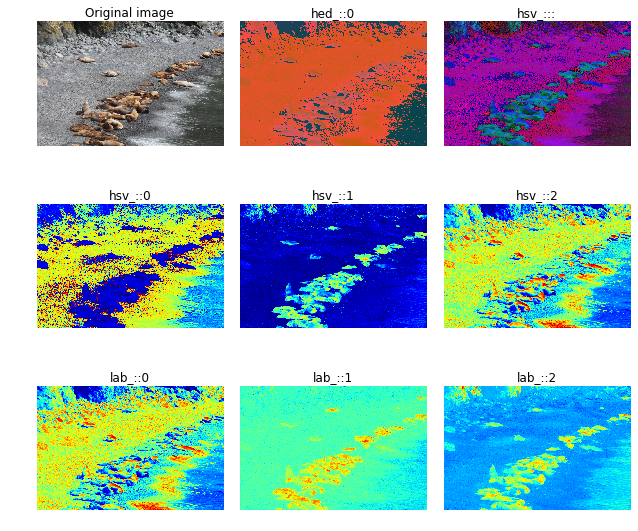

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import skimage as sk
from skimage import data
from skimage.color import rgb2hed
from skimage.color import rgb2hsv
from skimage.color import rgb2lab


from matplotlib.colors import LinearSegmentedColormap

# Create an artificial color channels
cmap_seal1 = LinearSegmentedColormap.from_list('mycmap', ['black', 'white'])
cmap_seal2 = LinearSegmentedColormap.from_list('mycmap', ['saddlebrown', 'white'])
cmap_seal3 = LinearSegmentedColormap.from_list('mycmap', ['tan', 'white'])


ihc_rgb = sk.io.imread("sealtest.jpg")
#ihc_rgb = sk.io.imread("seal_beach.jpg")

#ihc_rgb = data.immunohistochemistry()
ihc_hed = rgb2hed(ihc_rgb)
ihc_hsv = rgb2hsv(ihc_rgb)
ihc_lab = rgb2lab(ihc_rgb)


fig, axes = plt.subplots(3, 3, figsize=(9, 8), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

ax[0].imshow(ihc_rgb)
ax[0].set_title("Original image")

ax[1].imshow(ihc_hed[:, :, :])
ax[1].set_title("hed_::0")

ax[2].imshow(ihc_hsv[:, :, :])
ax[2].set_title("hsv_:::")

ax[3].imshow(ihc_hsv[:, :, 0])
ax[3].set_title("hsv_::0")

ax[4].imshow(ihc_hsv[:, :, 1])
ax[4].set_title("hsv_::1")

ax[5].imshow(ihc_hsv[:, :, 2])
ax[5].set_title("hsv_::2")

ax[6].imshow(ihc_lab[:, :, 0])
ax[6].set_title("lab_::0")

ax[7].imshow(ihc_lab[:, :, 1])
ax[7].set_title("lab_::1")

ax[8].imshow(ihc_lab[:, :, 2])
ax[8].set_title("lab_::2")





for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

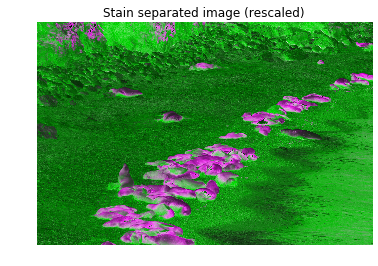

In [2]:
import numpy as np

from skimage.exposure import rescale_intensity

# Rescale hematoxylin and DAB signals and give them a fluorescence look
s1 = rescale_intensity(ihc_hed[:, :, 0], out_range=(0, 1))
s2 = rescale_intensity(ihc_hsv[:, :, 1], out_range=(0, 1.5))
s3 = rescale_intensity(ihc_hed[:, :, 2], out_range=(0, 1))
s4 = rescale_intensity(ihc_lab[:, :, 1], out_range=(0, 1))


#zdh = np.dstack((np.zeros_like(h), d, h))
zdh = np.dstack((s2, s1, s2))


fig = plt.figure()
axis = plt.subplot(1, 1, 1, sharex=ax[0], sharey=ax[0], adjustable='box-forced')
axis.imshow(zdh)
axis.set_title("Stain separated image (rescaled)")
axis.axis('off')
plt.show()



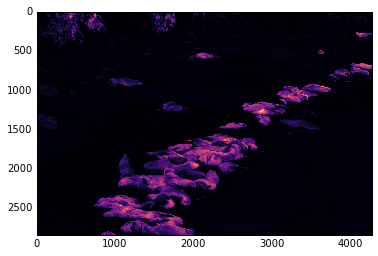

In [3]:
import matplotlib.image as mpimg
sealXray=plt.cm.magma((s2 * (1 - s1)*(2-s4)))
plt.imshow(s2 * (1 - s1)*(s4), cmap='magma')
#plt.imshow(s2-s2*1.0001, cmap='magma')

mpimg.imsave("seal_scan.jpg", sealXray)

In [4]:
seal_team_6 = s2 * (1 - s1)
from skimage import exposure

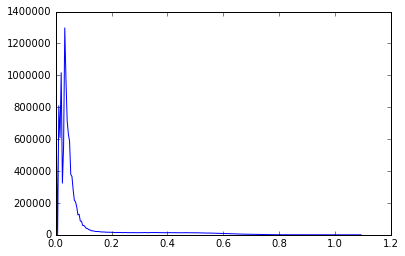

In [5]:
hist, ctr = exposure.histogram(seal_team_6)
plt.plot(ctr, hist)

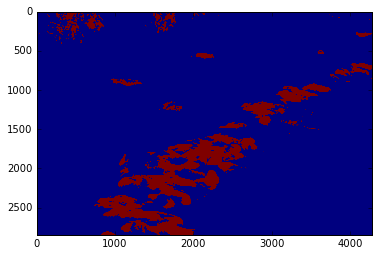

In [6]:
plt.imshow(seal_team_6 > 0.25)

In [7]:
np.sum(seal_team_6 > 0.3) / seal_team_6.size

0.085766869713420027